Association Rules

In [3]:
import pandas as pd   # for data manipulation and analysis
import numpy as np  # working with arrays
import seaborn as sns   #for visualization

In [4]:
df=pd.read_csv("Groceries_dataset (2).csv")   #loaing dataset

In [5]:
df.head()   #the first 5 rows

,Member_number,Date,itemDescription
0,1808,7/21/2015,tropical fruit
1,2300,9/19/2015,pip fruit
2,4941,2/14/2015,rolls/buns
3,3803,12/23/2015,pot plants
4,2762,3/20/2015,whole milk


In [6]:
df.tail()   #the last 5 rows

,Member_number,Date,itemDescription
38760,4796,2/3/2014,Instant food products
38761,4376,7/12/2014,rolls/buns
38762,3364,6/5/2014,oil
38763,4471,8/10/2014,sliced cheese
38764,1510,3/12/2014,fruit/vegetable juice


In [7]:
df.shape  #shape of dataset

(38765, 3)

In [8]:
df.info()   #some information about dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
Member_number      38765 non-null int64
Date               38765 non-null object
itemDescription    38765 non-null object
dtypes: int64(1), object(2)
memory usage: 908.6+ KB


In [9]:
df.describe(include='all') #some statistical summary about dataset

,Member_number,Date,itemDescription
count,38765.000000,38765,38765
unique,NaN,728,167
top,NaN,1/21/2015,whole milk
freq,NaN,96,2502
mean,3003.641868,NaN,NaN
std,1153.611031,NaN,NaN
min,1000.000000,NaN,NaN
25%,2002.000000,NaN,NaN
50%,3005.000000,NaN,NaN
75%,4007.000000,NaN,NaN


In [10]:
df.isna().any()   #checking for missing values

Member_number      False
Date               False
itemDescription    False
dtype: bool

as can be seen, there is no missing values in the dataset

In [11]:
#aggregating itemDescription based on Member_number and Date with "," seperator
groceries=df.groupby(['Member_number','Date'])['itemDescription'].agg(lambda x: ', '.join(set(x))).reset_index()

In [12]:
groceries.head()  #first 5 rows and seeing the change

,Member_number,Date,itemDescription
0,1000,11/25/2015,"sausage, hygiene articles"
1,1000,3/15/2015,"semi-finished bread, sausage, whole milk, yogurt"
2,1000,5/27/2015,"soda, pickled vegetables"
3,1000,6/24/2014,"salty snack, pastry, whole milk"
4,1000,7/24/2015,"misc. beverages, canned beer"


In [13]:
#Save groceries data frame in your pc
groceries.to_csv(r'groceries_itemlist1.csv', index = False)

In [14]:
#extracting the third column from groceries dataset
items=groceries['itemDescription']

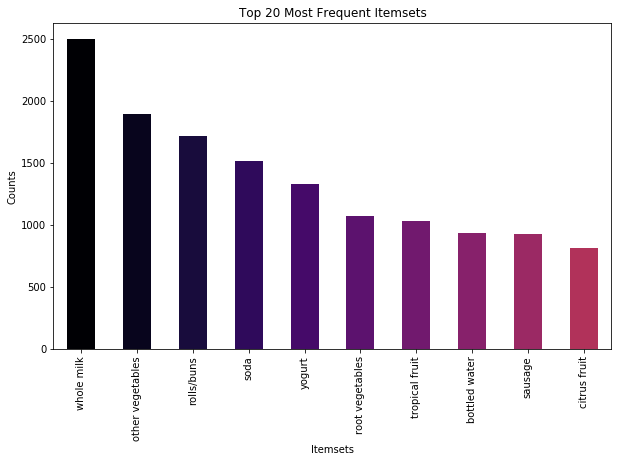

In [57]:
#visualizing top 10 itemsets
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,6)
color = plt.cm.inferno(np.linspace(0,1,20))
df['itemDescription'].value_counts().head(10).plot.bar(color = color)
plt.title('Top 20 Most Frequent Itemsets')
plt.ylabel('Counts')
plt.xlabel('Itemsets')
plt.show()

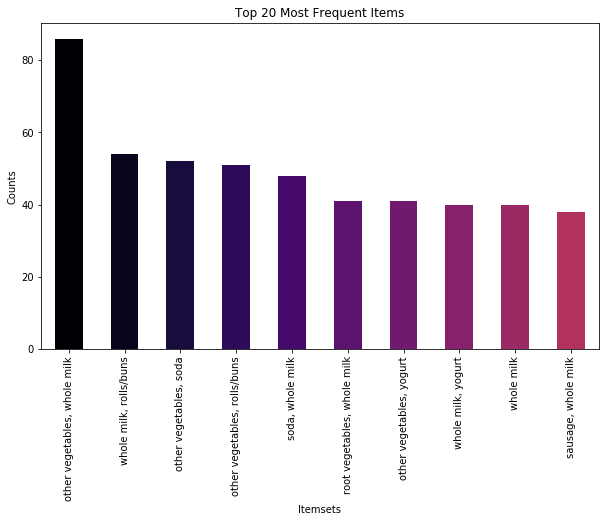

In [16]:
#visualizing top 10 itemsets
plt.rcParams['figure.figsize'] = (10,6)
color = plt.cm.inferno(np.linspace(0,1,20))
items.value_counts().head(10).plot.bar(color = color)
plt.title('Top 20 Most Frequent Itemsets')
plt.ylabel('Counts')
plt.xlabel('Itemsets')
plt.show()

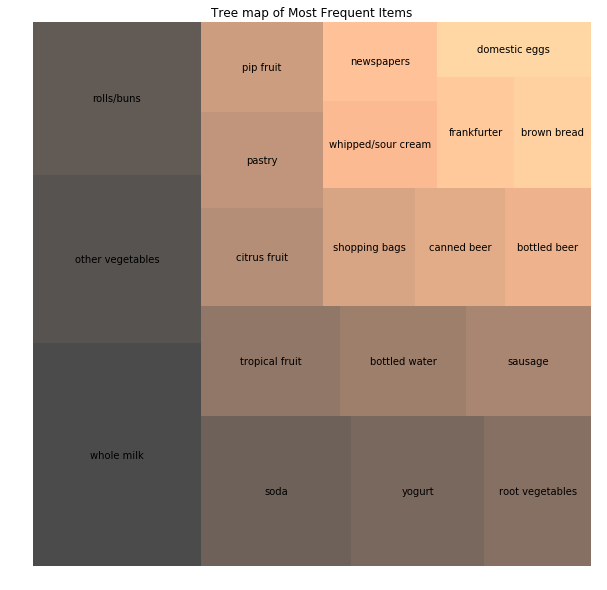

In [21]:
# Tree Map of Most Frequent Items
import squarify
plt.rcParams['figure.figsize']=(10,10)
Items = df['itemDescription'].value_counts().head(20).to_frame()
size = Items.values
lab = Items.index
color = plt.cm.copper(np.linspace(0,1,20))
squarify.plot(sizes=size, label=lab, alpha = 0.7, color=color)
plt.title('Tree map of Most Frequent Items')
plt.axis('off')
plt.show()

In [22]:
#converting items to list
data=items.values.tolist()
data

['sausage, hygiene articles',
 'semi-finished bread, sausage, whole milk, yogurt',
 'soda, pickled vegetables',
 'salty snack, pastry, whole milk',
 'misc. beverages, canned beer',
 'frankfurter, soda, whipped/sour cream',
 'soda, whole milk',
 'frankfurter, curd',
 'beef, white bread',
 'sausage, whole milk, rolls/buns',
 'whole milk, butter',
 'tropical fruit, sugar',
 'specialty chocolate, butter milk',
 'frozen vegetables, other vegetables',
 'dental care, frozen meals',
 'root vegetables, detergent',
 'sausage, rolls/buns',
 'rolls/buns',
 'cling film/bags, dish cleaner',
 'frozen fish, canned beer',
 'packaged fruit/vegetables, chocolate, whole milk, rolls/buns',
 'red/blush wine, chocolate, rolls/buns',
 'other vegetables, shopping bags',
 'other vegetables, hygiene articles',
 'tropical fruit, whole milk, pip fruit',
 'pastry, root vegetables, whole milk',
 'margarine, whipped/sour cream',
 'rolls/buns',
 'skin care, shopping bags',
 'softener, bottled water, rolls/buns',
 'chi

In [24]:
#convert the single string in each list to multiple strings separated by commas
table = []
for x in data:
    new_list = []
    y=x.split(',')
    for i in y:
        new_list.append(i.strip())
    table.append(new_list) 
table

[['sausage', 'hygiene articles'],
 ['semi-finished bread', 'sausage', 'whole milk', 'yogurt'],
 ['soda', 'pickled vegetables'],
 ['salty snack', 'pastry', 'whole milk'],
 ['misc. beverages', 'canned beer'],
 ['frankfurter', 'soda', 'whipped/sour cream'],
 ['soda', 'whole milk'],
 ['frankfurter', 'curd'],
 ['beef', 'white bread'],
 ['sausage', 'whole milk', 'rolls/buns'],
 ['whole milk', 'butter'],
 ['tropical fruit', 'sugar'],
 ['specialty chocolate', 'butter milk'],
 ['frozen vegetables', 'other vegetables'],
 ['dental care', 'frozen meals'],
 ['root vegetables', 'detergent'],
 ['sausage', 'rolls/buns'],
 ['rolls/buns'],
 ['cling film/bags', 'dish cleaner'],
 ['frozen fish', 'canned beer'],
 ['packaged fruit/vegetables', 'chocolate', 'whole milk', 'rolls/buns'],
 ['red/blush wine', 'chocolate', 'rolls/buns'],
 ['other vegetables', 'shopping bags'],
 ['other vegetables', 'hygiene articles'],
 ['tropical fruit', 'whole milk', 'pip fruit'],
 ['pastry', 'root vegetables', 'whole milk'],
 

In [26]:
#Encode transaction data in Python lists
from mlxtend.preprocessing import TransactionEncoder
te=TransactionEncoder()
te_ar=te.fit(table).transform(table)

C:\Users\lenovo\Anaconda3\lib\site-packages\scipy\__init__.py:140: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.16.2)
  UserWarning)


In [27]:
#making a dataframe of transaction data
trans_data=pd.DataFrame(te_ar, columns=te.columns_)

In [28]:
#seeing the first 5 rows of trans_data
trans_data.head()

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [44]:
#Apriori algorithm Implementation 
from mlxtend.frequent_patterns import apriori
#generate frequent itemsets using Apriori algorithm
frequent_itemsets = apriori(trans_data,min_support=0.001,use_colnames=True)

In [70]:
#sorting frequent items based on their support value
frequent_itemsets=frequent_itemsets.sort_values(['support'],ascending=False)

In [81]:
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x : len(x))

In [97]:
frequent_itemsets.sort_values(by='support', ascending=False).head(10)

,support,itemsets,length
146,0.157923,(whole milk),1
90,0.122101,(other vegetables),1
109,0.110005,(rolls/buns),1
123,0.097106,(soda),1
147,0.085879,(yogurt),1
110,0.069572,(root vegetables),1
139,0.067767,(tropical fruit),1
10,0.060683,(bottled water),1
115,0.060349,(sausage),1
28,0.053131,(citrus fruit),1


In [98]:
#Filter Frequent itemset of minimum length 2
frequent_itemsets[frequent_itemsets['length'] >= 2].head(20)

,support,itemsets,length
625,0.014837,"(other vegetables, whole milk)",2
677,0.013968,"(whole milk, rolls/buns)",2
717,0.011629,"(soda, whole milk)",2
740,0.011161,"(whole milk, yogurt)",2
609,0.010559,"(other vegetables, rolls/buns)",2
616,0.009691,"(other vegetables, soda)",2
701,0.008955,"(sausage, whole milk)",2
730,0.008220,"(tropical fruit, whole milk)",2
626,0.008087,"(other vegetables, yogurt)",2
669,0.008087,"(soda, rolls/buns)",2


In [99]:
#generating association rules
from mlxtend.frequent_patterns import association_rules
rules =association_rules(frequent_itemsets,metric='lift',min_threshold=1)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(soda),(sausage),0.097106,0.060349,0.005948,0.061253,1.014975,0.000088,1.000963
1,(sausage),(soda),0.060349,0.097106,0.005948,0.098560,1.014975,0.000088,1.001613
2,(sausage),(yogurt),0.060349,0.085879,0.005748,0.095238,1.108986,0.000565,1.010345
3,(yogurt),(sausage),0.085879,0.060349,0.005748,0.066926,1.108986,0.000565,1.007049
4,(frankfurter),(other vegetables),0.037760,0.122101,0.005146,0.136283,1.116150,0.000536,1.016420


In [80]:
rules.shape  #dimension of rules dataset

(450, 9)

In [120]:
rules=rules.sort_values(by='lift', ascending=False)

In [121]:
rules1=rules[['antecedents','consequents','support','confidence','lift']]

In [122]:
rules1.shape

(240, 5)

In [123]:
rules1.head(10)

,antecedents,consequents,support,confidence,lift
82,"(whole milk, yogurt)",(sausage),0.001470,0.131737,2.182917
83,(sausage),"(whole milk, yogurt)",0.001470,0.024363,2.182917
80,"(sausage, whole milk)",(yogurt),0.001470,0.164179,1.911760
85,(yogurt),"(sausage, whole milk)",0.001470,0.017121,1.911760
102,(citrus fruit),(specialty chocolate),0.001403,0.026415,1.653762
103,(specialty chocolate),(citrus fruit),0.001403,0.087866,1.653762
81,"(sausage, yogurt)",(whole milk),0.001470,0.255814,1.619866
84,(whole milk),"(sausage, yogurt)",0.001470,0.009310,1.619866
201,(tropical fruit),(flour),0.001069,0.015779,1.617141
200,(flour),(tropical fruit),0.001069,0.109589,1.617141


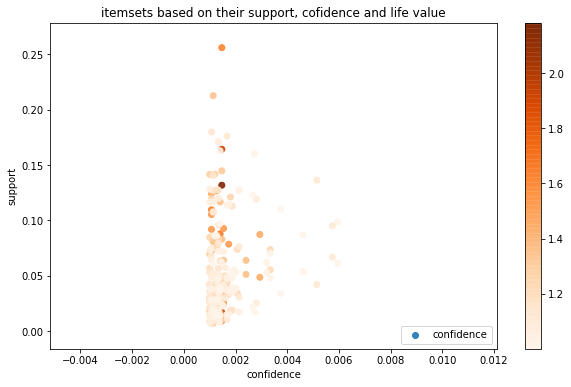

In [124]:
# generating scatter plot
plt.scatter(x=rules1.support, y=rules1.confidence, alpha = .9, c = rules1.lift, cmap = 'Oranges')
cbar = plt.colorbar() 
# Move the legend to an empty part of the plot
plt.legend(loc='lower right')
plt.xlabel('confidence')
plt.ylabel('support')
plt.title('itemsets based on their support, cofidence and life value')
plt.show()

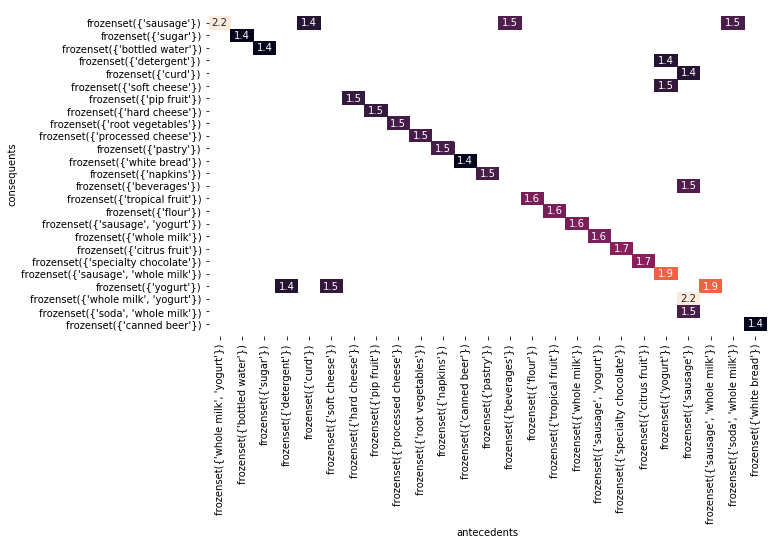

In [126]:
# Transform the DataFrame of rules into a matrix using the lift metric
pivot = rules1.head(30).pivot(index = 'consequents', 
                    columns = 'antecedents', values= 'lift')

# Generate a heatmap with annotations on and the colorbar off
plt.figure(figsize=(10,6))
sns.heatmap(pivot, annot = True, cbar = False)
b, t = plt.ylim() 
b += 0.5 
t -= 0.5 
plt.ylim(b, t) 
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

In [149]:
# Function to convert rules to coordinates.
def rules_to_coordinates(rules):
    rules['antecedent'] = rules['antecedents'].apply(lambda antecedent: str(antecedent))
    rules['consequent'] = rules['consequents'].apply(lambda consequent: str(consequent))
    rules['rule'] = rules.lift
    return rules[['antecedent','consequent','rule']]

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#i

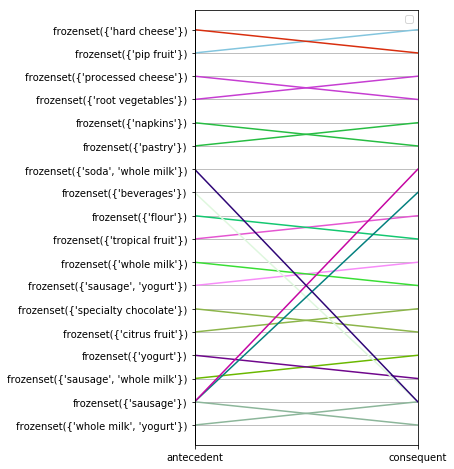

In [170]:
from pandas.plotting import parallel_coordinates
coords = rules_to_coordinates(rules1.head(20))

# Generate parallel coordinates plot
plt.figure(figsize=(4,8))
parallel_coordinates(coords, 'rule')
plt.legend([])
plt.grid(True)
plt.show()